# Analyzing the hype around Nike Off White Sneakers 
This notebook makes use of the data released by Stock X as part of their yearly data visualization challenge and attempts to quantify  "hype" as a metric and how Nike as a company or Stock X in this case can capitalize on it


Nike is a premium brand and one that defines a certain type of an active lifestyle. This is defined by it's products which valued, exclusively held and traded for a serious profit. 

Platforms like 'Stock X' & 'GOAT' are machines that fan the flames of "hype". To further make a select few products exclusive, Nike is known to release a limited quantities along with extensive collaboration with athletic celebrities. These factors make a product even more desirable and coveted.



In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
from datetime import datetime
from datetime import date
import os
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
#Reading the data
df = pd.read_excel(os.getcwd()+ "\data\StockX-Data-Contest-2019-3.xlsx", sheet_name='Raw Data')
nike = df[(df['Brand'] == 'Off-White')]
nike = nike.drop(columns=['Brand'])

In [76]:
## Descriptive Statistics
print("Field Descriptions - \n")
print(df.info())

print("\n\nData Descriptions - ")
df.describe()

Field Descriptions - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB
None


Data Descriptions - 


,Sale Price,Retail Price,Shoe Size
count,99956.000000,99956.00000,99956.000000
mean,446.634754,208.61359,9.344181
std,255.982918,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [3]:
## Basic Data Manipulation - 
#Converting timestamp to date & creating a column to hold the week number
nike['Release Week'] = nike['Release Date'].dt.week
nike['Release Date'] = nike['Release Date'].dt.date

nike['Order Week'] = nike['Order Date'].dt.week
nike['Order Date'] = nike['Order Date'].dt.date

## Hype as a metric
Hype can be quantified to be composed of 2 key elements - 
    1. % Markup in price from the retail price 
    2. Duration (in weeks) before which this markup returns to back to average levels or until stocks run out. 
    
Understanding this can help us understand how hype around a product behaves and further explore it's intricasies

For the sake of this exerise, let's consider a product was hyped - If on average, it sold for atleast twice it's retail price in a given week. 

We can then look at how long this hype lasted through the weeks and compare the hype factor across the product assortment. 

Note - Since the data we see here is basically re-sale data, We cannot look at it in the same way we look at sales data. The market here is not exactly driven by supply and demand in the traditional sense.
If a certain product is available, people are willing to buy that with little regard to the marked up price. 

Hence it makes sense to look at how much was the markup(%) that people paid for on a given day rather than how many people bought a particular product

In [4]:
#Calculating the Percentage Markup from the original Retail Price
nike['Markup_pcent'] = np.round((nike['Sale Price']/nike['Retail Price'])*100,1)

### There are multiple ways we can look at the change in hype through time- 
1. Centering the data at the first sale date - We can analyze the hype trends of each of the products over time

In [5]:
#Extracting the first sale dates for each of the products
fod_df = pd.DataFrame(columns = ['Sneaker Name','FO_Date'])

for sneaker in nike['Sneaker Name'].unique().tolist():
    fod = nike[(nike['Sneaker Name'] == sneaker)]['Order Date'].min()
    fod_df = fod_df.append(pd.DataFrame([[sneaker, fod]], columns=['Sneaker Name','FO_Date']), ignore_index = True)

#Further merging the same with the original data frame - 
nike = pd.merge(nike, fod_df, how='left', on=['Sneaker Name'])

#Computing the number of months from First Sale Date
nike['FO_months'] = nike['Order Date'] - nike['FO_Date']
# nike['FO_months'] = np.ceil(nike['FO_months']/np.timedelta64(1, 'M'))
nike['FO_months'] = nike['FO_months']/np.timedelta64(1, 'M')

#Computing the number of weeks from the First Sale Date
nike['FO_weeks'] = nike['Order Date'] - nike['FO_Date']
# nike['FO_weeks'] = np.ceil(nike['FO_weeks']/np.timedelta64(1, 'W'))
nike['FO_weeks'] = nike['FO_weeks']/np.timedelta64(1, 'W')

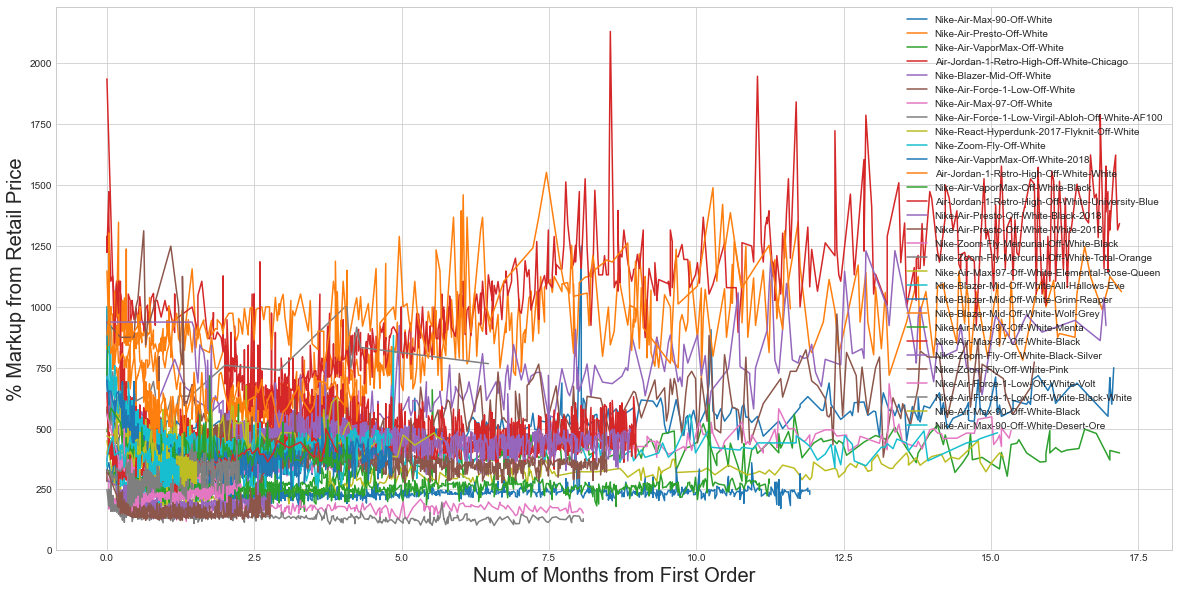

In [7]:
#Plotting the same
for sneaker in nike['Sneaker Name'].unique().tolist():
    x = nike[(nike['Sneaker Name'] == sneaker)]['FO_months']
    y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
    plt.plot(x,y, label = sneaker)

plt.ylabel('% Markup from Retail Price', fontsize=20)
plt.xlabel('Num of Months from First Order', fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(loc='upper right', frameon=False)

Some observations that can be drawn from the above line graph -
1. Some products go well beyond the 1 year mark after release
2. A common trend - Most products loose some hype right after the first few weeks of sale, while we can also see some of those products regain hype a few weeks down the line.

It would be interesting to look at it against the Release date

In [14]:
#Centering the data at week 0 = Release week
nike['From_Release_months'] = nike['Order Date'] - nike['Release Date']
nike['From_Release_months'] = np.ceil(nike['From_Release_months']/np.timedelta64(1, 'M'))

nike['From_Release_weeks'] = nike['Order Date'] - nike['Release Date'] 
nike['From_Release_weeks'] = np.ceil(nike['From_Release_weeks']/np.timedelta64(1, 'W'))

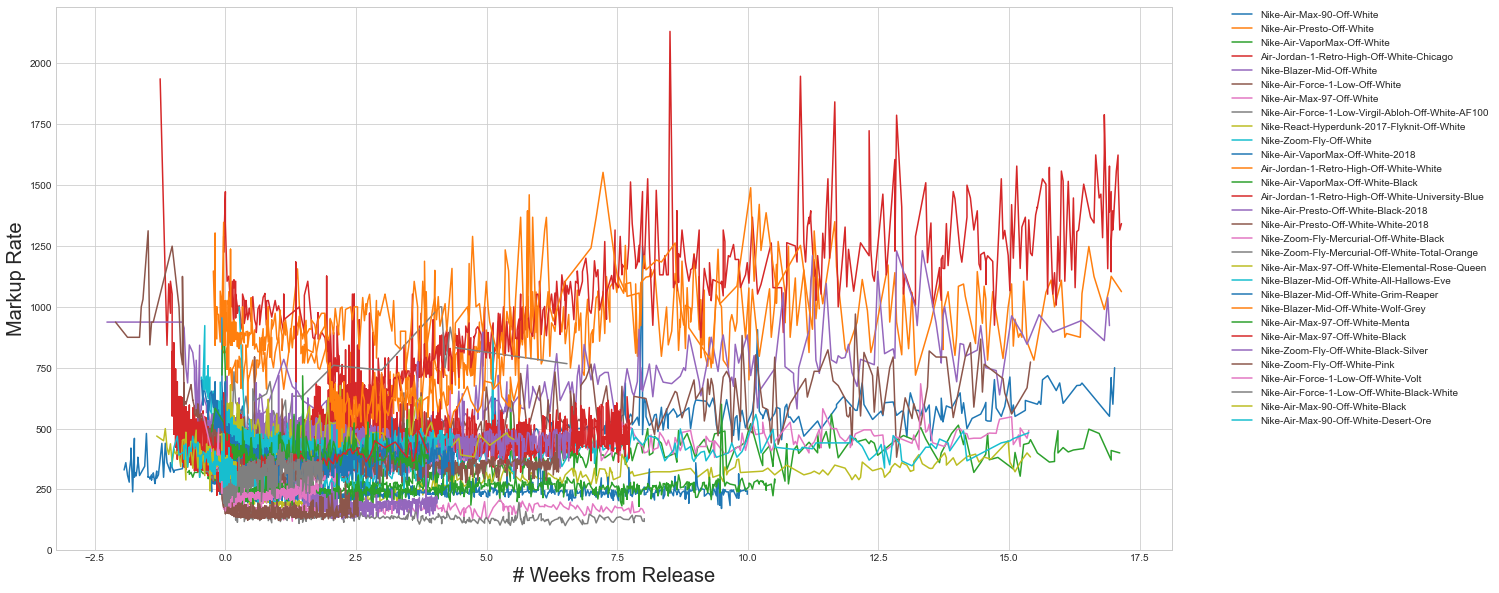

In [9]:
for sneaker in nike['Sneaker Name'].unique().tolist():
    plt.plot(nike[(nike['Sneaker Name'] == sneaker)]['From_Release_months'], nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent'], label = sneaker)
plt.ylabel('Markup Rate', fontsize=20)
plt.xlabel('# Weeks from Release', fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

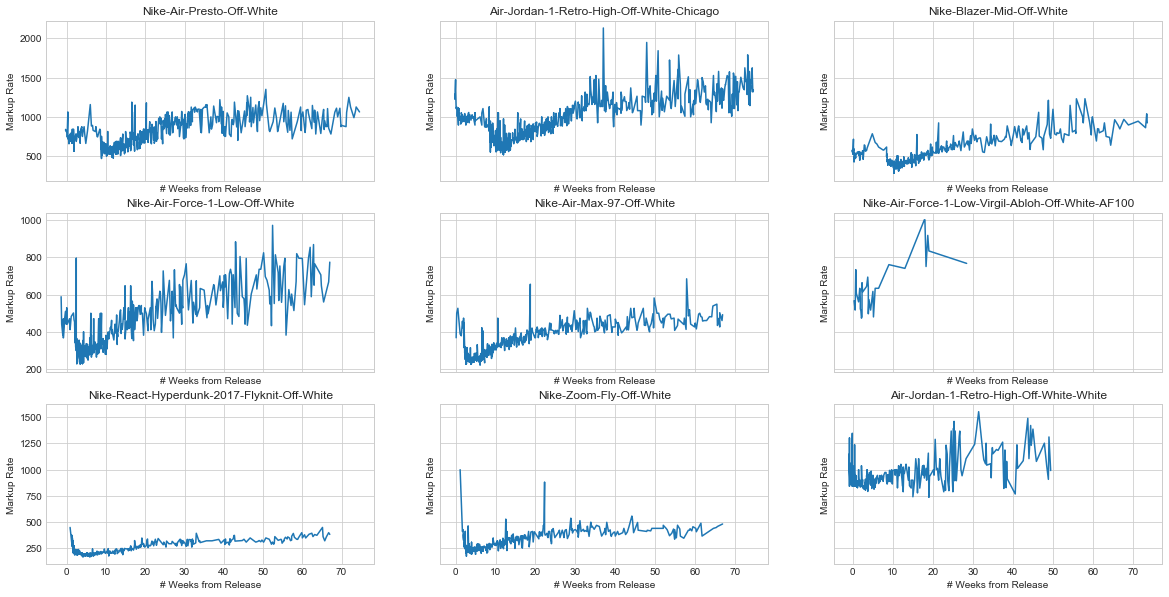

In [101]:
# f,((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,sharex='col',sharey='row')
f,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex='col',sharey='row')

# for i in [1, 3, 4, 5, 6, 7, 8, 9, 11]:
sneaker = nike['Sneaker Name'].unique().tolist()[1]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax1.plot(x,y, label = sneaker)
ax1.set_title(sneaker)
ax1.set_xlabel('# Weeks from Release')
ax1.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[3]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax2.plot(x,y)
ax2.set_title(sneaker)
ax2.set_xlabel('# Weeks from Release')
ax2.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[4]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax3.plot(x,y)
ax3.set_title(sneaker)
ax3.set_xlabel('# Weeks from Release')
ax3.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[5]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax4.plot(x,y)
ax4.set_title(sneaker)
ax4.set_xlabel('# Weeks from Release')
ax4.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[6]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax5.plot(x,y)
ax5.set_title(sneaker)
ax5.set_xlabel('# Weeks from Release')
ax5.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[7]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax6.plot(x,y)
ax6.set_title(sneaker)
ax6.set_xlabel('# Weeks from Release')
ax6.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[8]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax7.plot(x,y)
ax7.set_title(sneaker)
ax7.set_xlabel('# Weeks from Release')
ax7.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[9]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax8.plot(x,y)
ax8.set_title(sneaker)
ax8.set_xlabel('# Weeks from Release')
ax8.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[11]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax9.plot(x,y)
ax9.set_title(sneaker)
ax9.set_xlabel('# Weeks from Release')
ax9.set_ylabel('Markup Rate')

plt.show()

Text(0, 0.5, 'Markup Rate')

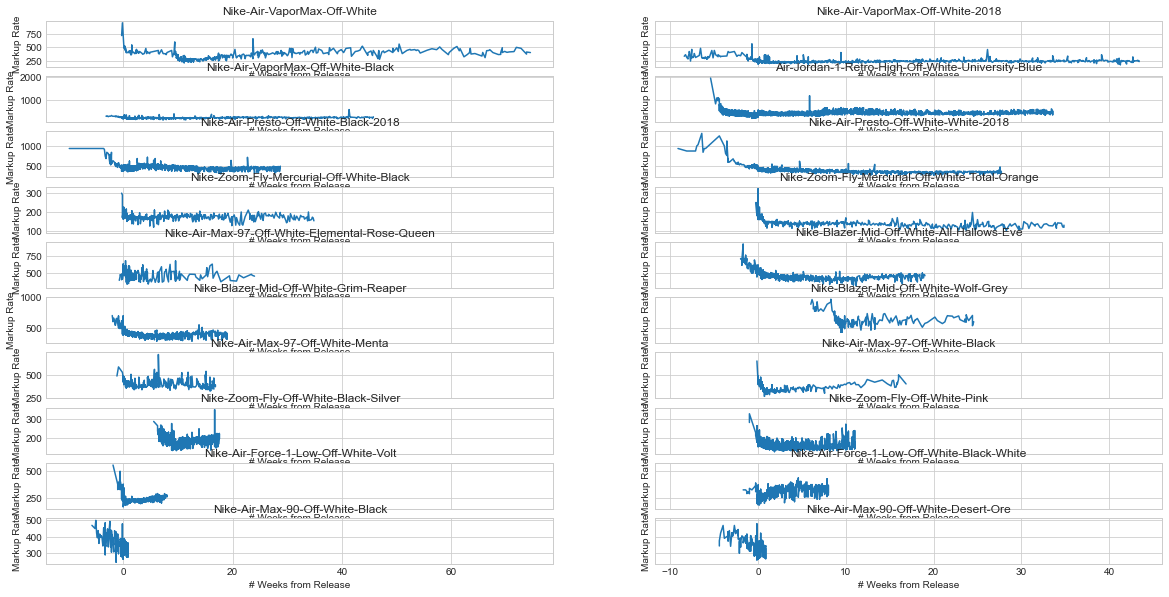

In [106]:
# f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10, ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5,4,sharex='col',sharey='row')
f,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10), (ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20)) = plt.subplots(10,2,sharex='col',sharey='row')

# for i in [2, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:
sneaker = nike['Sneaker Name'].unique().tolist()[2]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax1.plot(x,y)
ax1.set_title(sneaker)
ax1.set_xlabel('# Weeks from Release')
ax1.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[10]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax2.plot(x,y)
ax2.set_title(sneaker)
ax2.set_xlabel('# Weeks from Release')
ax2.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[12]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax3.plot(x,y)
ax3.set_title(sneaker)
ax3.set_xlabel('# Weeks from Release')
ax3.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[13]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax4.plot(x,y)
ax4.set_title(sneaker)
ax4.set_xlabel('# Weeks from Release')
ax4.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[14]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax5.plot(x,y)
ax5.set_title(sneaker)
ax5.set_xlabel('# Weeks from Release')
ax5.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[15]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax6.plot(x,y)
ax6.set_title(sneaker)
ax6.set_xlabel('# Weeks from Release')
ax6.set_ylabel('Markup Rate')


sneaker = nike['Sneaker Name'].unique().tolist()[16]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax7.plot(x,y)
ax7.set_title(sneaker)
ax7.set_xlabel('# Weeks from Release')
ax7.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[17]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax8.plot(x,y)
ax8.set_title(sneaker)
ax8.set_xlabel('# Weeks from Release')
ax8.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[18]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax9.plot(x,y)
ax9.set_title(sneaker)
ax9.set_xlabel('# Weeks from Release')
ax9.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[19]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax10.plot(x,y)
ax10.set_title(sneaker)
ax10.set_xlabel('# Weeks from Release')
ax10.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[20]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax11.plot(x,y)
ax11.set_title(sneaker)
ax11.set_xlabel('# Weeks from Release')
ax11.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[21]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax12.plot(x,y)
ax12.set_title(sneaker)
ax12.set_xlabel('# Weeks from Release')
ax12.set_ylabel('Markup Rate')


sneaker = nike['Sneaker Name'].unique().tolist()[22]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax13.plot(x,y)
ax13.set_title(sneaker)
ax13.set_xlabel('# Weeks from Release')
ax13.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[23]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax14.plot(x,y)
ax14.set_title(sneaker)
ax14.set_xlabel('# Weeks from Release')
ax14.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[24]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax15.plot(x,y)
ax15.set_title(sneaker)
ax15.set_xlabel('# Weeks from Release')
ax15.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[25]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax16.plot(x,y)
ax16.set_title(sneaker)
ax16.set_xlabel('# Weeks from Release')
ax16.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[26]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax17.plot(x,y)
ax17.set_title(sneaker)
ax17.set_xlabel('# Weeks from Release')
ax17.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[27]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax18.plot(x,y)
ax18.set_title(sneaker)
ax18.set_xlabel('# Weeks from Release')
ax18.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[28]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax19.plot(x,y)
ax19.set_title(sneaker)
ax19.set_xlabel('# Weeks from Release')
ax19.set_ylabel('Markup Rate')

sneaker = nike['Sneaker Name'].unique().tolist()[29]
x = nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks']
y = nike[(nike['Sneaker Name'] == sneaker)]['Markup_pcent']
ax20.plot(x,y)
ax20.set_title(sneaker)
ax20.set_xlabel('# Weeks from Release')
ax20.set_ylabel('Markup Rate')

#### It would be interesting to see during which weeks relative the release week, the markup is at it's lowest

In [29]:
mean_markup = nike[['Sneaker Name', 'From_Release_weeks','Markup_pcent']].groupby(['Sneaker Name', 'From_Release_weeks'], as_index=False).mean()
mean_markup = mean_markup.rename(columns = {'Markup_pcent':'Avg_Markup_pcent'})

#Further merging the same with the original data frame - 
nike = pd.merge(nike, mean_markup, how='left', on=['Sneaker Name', 'From_Release_weeks'])

In [30]:
overall_mean = mean_markup.groupby(['From_Release_weeks'], as_index=False).mean()

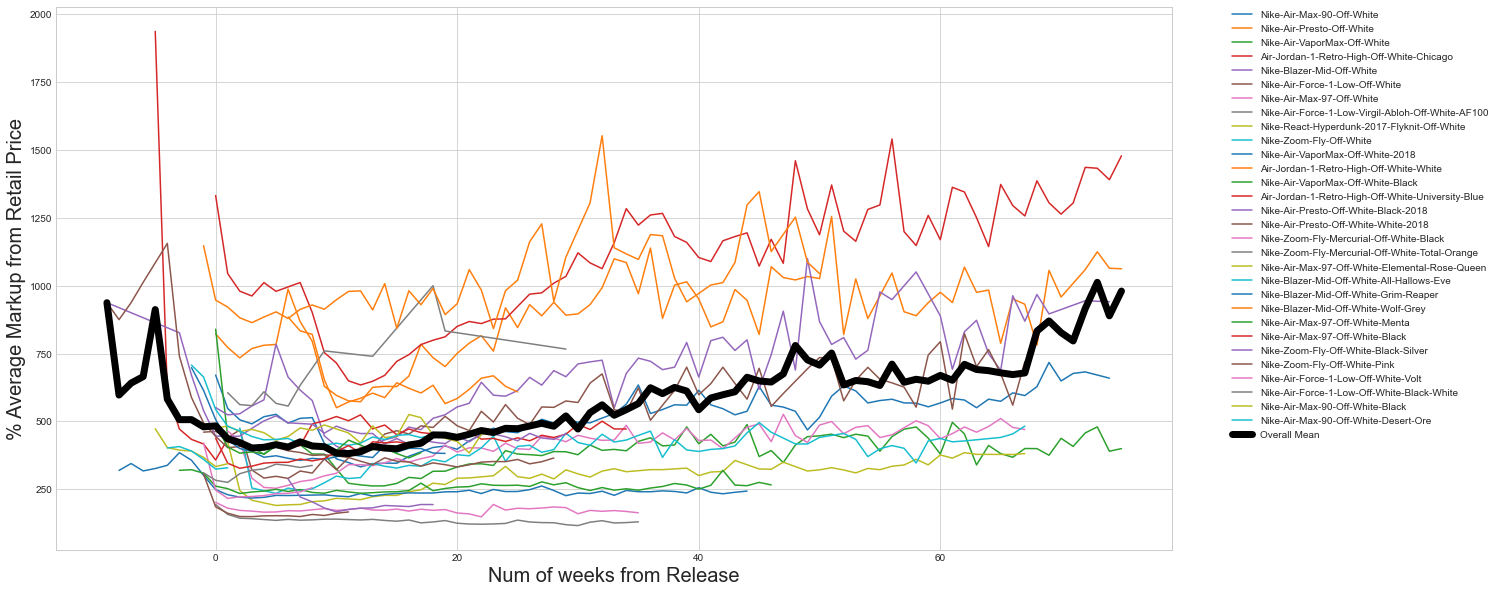

In [31]:
for sneaker in nike['Sneaker Name'].unique().tolist():
    plt.plot(nike[(nike['Sneaker Name'] == sneaker)]['From_Release_weeks'], nike[(nike['Sneaker Name'] == sneaker)]['Avg_Markup_pcent'], label = sneaker)

plt.plot(overall_mean['From_Release_weeks'], overall_mean['Avg_Markup_pcent'], label = "Overall Mean", color = 'black', linewidth=7.0)
    
plt.ylabel('% Average Markup from Retail Price',fontsize=20)
plt.xlabel('Num of weeks from Release',fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
# plt.legend(loc='upper right', frameon=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

It looks like overall lowest point in hype follows the release week. This is time when the market is saturated with the product release from Nike as well as re-sales from sellers on Stock-X. 

Further, we can identify the specific set of weeks where we can observe the lowest hype. Through manual inspection of the underlying averages, we can statistically say that the weeks with the lowest hype is from Week 1 through week 17 from the release. 

If you are someone looking to sell, you are better off either making a sale before the release week or hold off until week 18 to see a better profit.

Additionally, if the sneaker falls under bucket 1, then you are better off waiting until week 40 to make a sale since you you somewhat likely stand to make a profit with atleast 500% margin. 

### Insights from the hype trends of the 2 types of products

The hype universally seems to drop right after a release. The difference between the 2 types of products is that fact that it pick up again after a few weeks. 
- Statistically the week #1 and week #2 see some of the lowest hype for the product. This makes sense since it is when the market is saturated with the product. 

### Additionally, It would be interesting to know which part of the country drives most of this hype

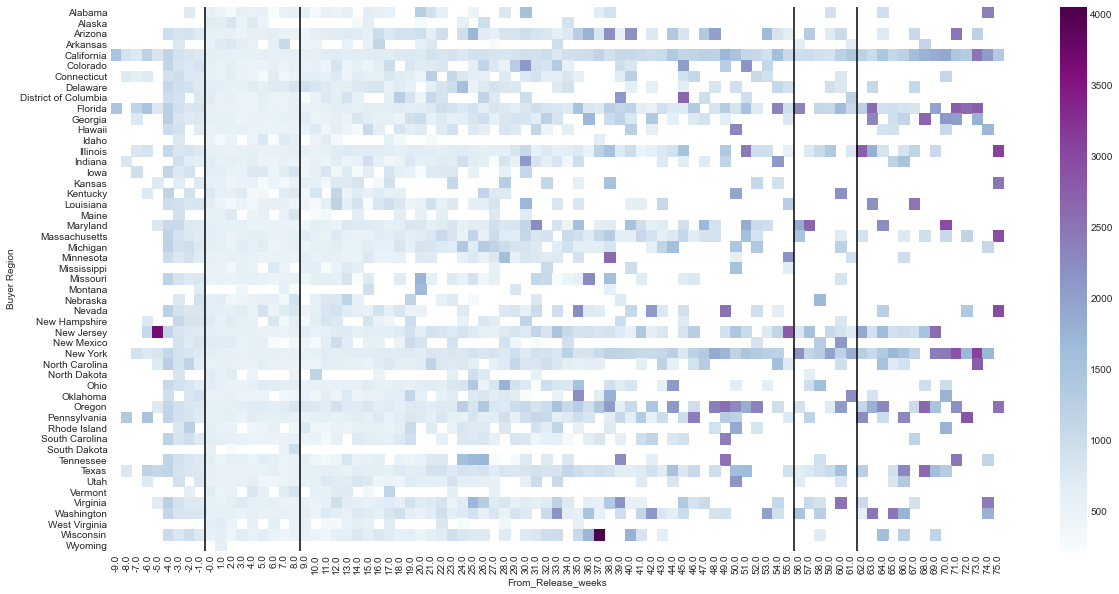

In [24]:
## Visualizing the same in a heatmap - By Region
nike_heatmap = nike.pivot_table('Sale Price',['Buyer Region'], 'From_Release_weeks')
plt = sns.heatmap(nike_heatmap, cmap = 'BuPu')
plt.vlines([9,18, 65,71], *plt.get_xlim())

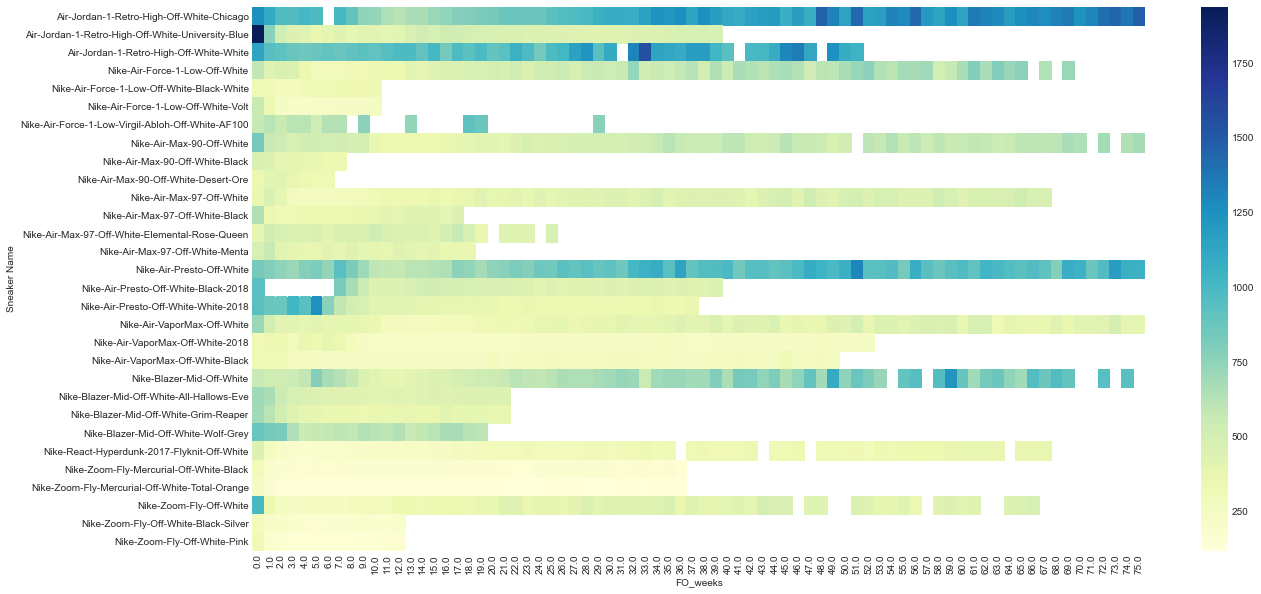

In [13]:
## Visualizing the same in a heatmap - 
nike_heatmap = nike.pivot_table('Markup_pcent',['Sneaker Name'], 'FO_weeks')
sns.heatmap(nike_heatmap, cmap = 'YlGnBu')

Although not the prettiest line graph, it is evident that a handful number of styles are more hyped than others. 
Such styles have hypes that do not come down even after a few weeks.

One observation that jumps out is that there seems to be an obvious cyclic pattern the sales seem to follow. It would be interesting to see the same contrasted with the release date. 
